# IPL Exoloratory Analysis Part-III

### In this part-II, we will explore some bowling stats from different perspecticves like seasonwise, teamwise, match aggregates, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
matches = pd.read_csv('matches.csv')
deliv = pd.read_csv('deliveries.csv')
deliv

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [3]:
team_names=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

abbrs = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(team_names,abbrs,inplace = True)
deliv.replace(team_names, abbrs, inplace = True)

#matches.drop(columns='umpire3', inplace=True)

deliv = deliv[deliv['inning']<3]
matches = matches[matches['result']=='normal']
matches = matches[matches['dl_applied'] == 0]

deliv = deliv.merge(matches, left_on='match_id', right_on='id')

In [15]:
## Taking care of a few things
def batruns(nb):
    if nb>1:
        bat = nb - 1
        return int(bat)
def extraruns(nb):
    if nb>1:
        return 1

def num_wkts(dism):
    dismissal_kinds = ['bowled', 'caught','run out','lbw', 'stumped', 'caught and bowled', 
                   'hit wicket', 'obstructing the field']
    if dism in dismissal_kinds:
        return 1
    else :
        return 0

In [5]:
deliv['batsman_runs'] = deliv.apply(lambda row: batruns(row['noball_runs']), axis=1)

In [6]:
deliv['extra_runs'] = deliv.apply(lambda row: extraruns(row['noball_runs']), axis=1)

In [17]:
deliv['num_wkts'] = deliv.apply(lambda row: num_wkts(row['dismissal_kind']), axis=1)

## Total Wickets Fallen

In [20]:
all_wkts = deliv[deliv['num_wkts'] == 1]
print('Total number of wickets fallen :',len(all_wkts['match_id']))

Total number of wickets fallen : 8505


## Avergae Wickets per Match

In [22]:
avg_wkts = all_wkts['num_wkts'].sum() / matches['id'].count()
print('Average wickets fallen per match is', avg_wkts)

Average wickets fallen per match is 11.747237569060774


## Seasonwise Total & Average Wickets 

Text(0.5, 1.0, 'Total Wickets Fallen per Season')

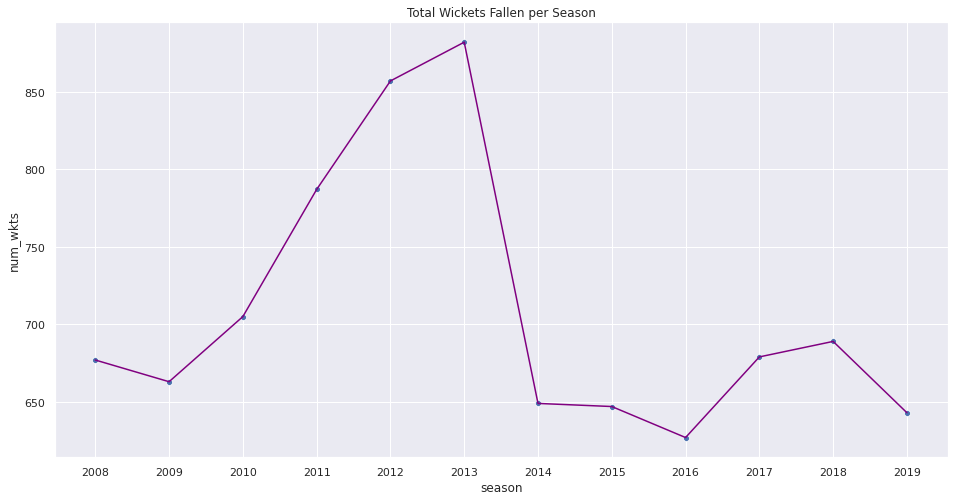

In [31]:
plt.figure(figsize=(16,8))
season = deliv.groupby('season')['num_wkts'].sum().reset_index()
season['matches']= matches.groupby('season')['id'].count().reset_index()['id']
season['avg_wkts'] = season['num_wkts'] / season['matches']
sns.lineplot(x='season',y='num_wkts', data=season,color='purple')
plt.xticks(np.arange(2008,2020))
sns.scatterplot(x='season',y='num_wkts', data=season)
plt.title('Total Wickets Fallen per Season')

Text(0.5, 1.0, 'Total Wickets Fallen per Season')

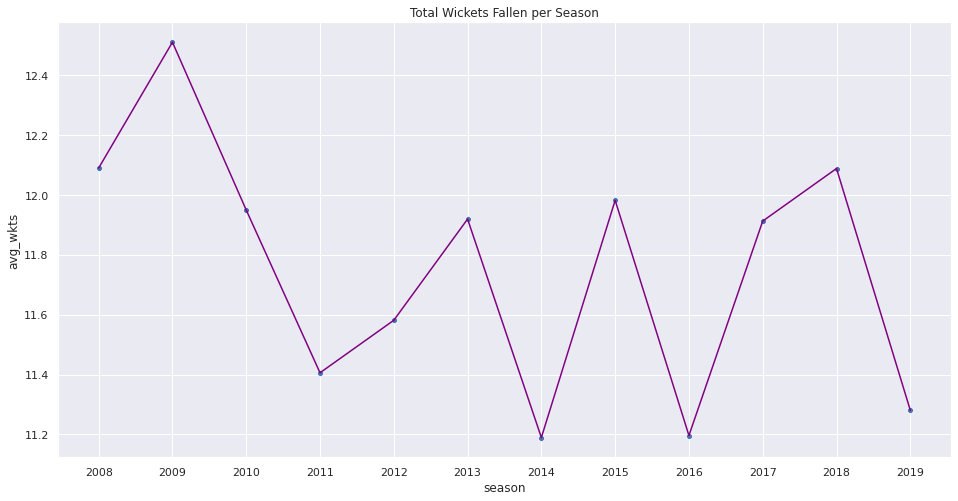

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(x='season',y='avg_wkts', data=season, color='purple')
plt.xticks(np.arange(2008,2020))
sns.scatterplot(x='season',y='avg_wkts', data=season)
plt.title('Total Wickets Fallen per Season')

### Some Observations : 
- The 2013 season had a peak in number of wickets because of the obvious, most number of matches.
- The 2009 season was the best season from the bowler's point of view (it was played in South Africa).
- And, the avg. wickets per match has lingering around 11.5 for many years.

## Is there a place for bowlers to go somewhere?

In [36]:
mat = matches['venue'].value_counts().reset_index()
venues = deliv.groupby('venue')['num_wkts'].sum().reset_index()
mat.columns = ['venue', 'matches']
venues = mat.merge(venues, on='venue')
venues['avg_wkts'] = venues['num_wkts']/venues['matches']
venues = venues.sort_values(by = 'avg_wkts', ascending=False)
venues[:10]

,venue,matches,num_wkts,avg_wkts
31,"Vidarbha Cricket Association Stadium, Jamtha",3,48,16.000000
27,Newlands,5,71,14.200000
11,Kingsmead,14,194,13.857143
28,Nehru Stadium,4,55,13.750000
33,ACA-VDCA Stadium,2,27,13.500000
26,Sheikh Zayed Stadium,6,81,13.500000
17,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,9,119,13.222222
32,De Beers Diamond Oval,3,39,13.000000
10,Dr DY Patil Sports Academy,17,216,12.705882
30,Buffalo Park,3,38,12.666667


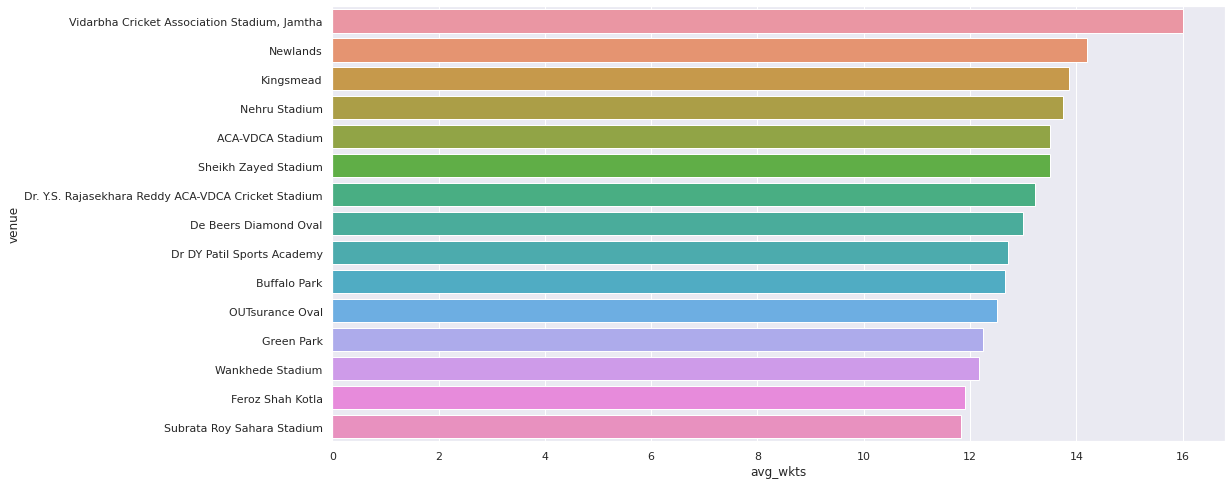

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(y='venue', x='avg_wkts', data=venues[:15], orient='h')

#### VCA stadium has the highest average per match wickets (48 wickets in just 3 matches played).
#### Also, Kingsmead has the highest wicket average with more than a 100 wickets (13.85 wpm).

## Is everybody out or should I come back later?

In [45]:
## Checking the number of all-outs 
ao = deliv.groupby(['match_id','inning'])['num_wkts'].sum().reset_index()
ao = ao[ao['num_wkts']==10]
print('There have been %s instances of a team being all-out'%(len(ao)))

There have been 128 instances of a team being all-out


### Seasonwise AllOut Instances

In [52]:
ss = deliv.groupby(['season','match_id','inning'])['num_wkts'].sum().reset_index()
ss = ss[ss['num_wkts']==10]
season['all_outs'] = ss.groupby('season')['num_wkts'].count().reset_index()['num_wkts']
season

,season,num_wkts,matches,avg_wkts,all_outs
0,2008,677,56,12.089286,14
1,2009,663,53,12.509434,11
2,2010,705,59,11.949153,13
3,2011,787,69,11.405797,12
4,2012,857,74,11.581081,10
5,2013,882,74,11.918919,15
6,2014,649,58,11.189655,7
7,2015,647,54,11.981481,7
8,2016,627,56,11.196429,7
9,2017,679,57,11.912281,14


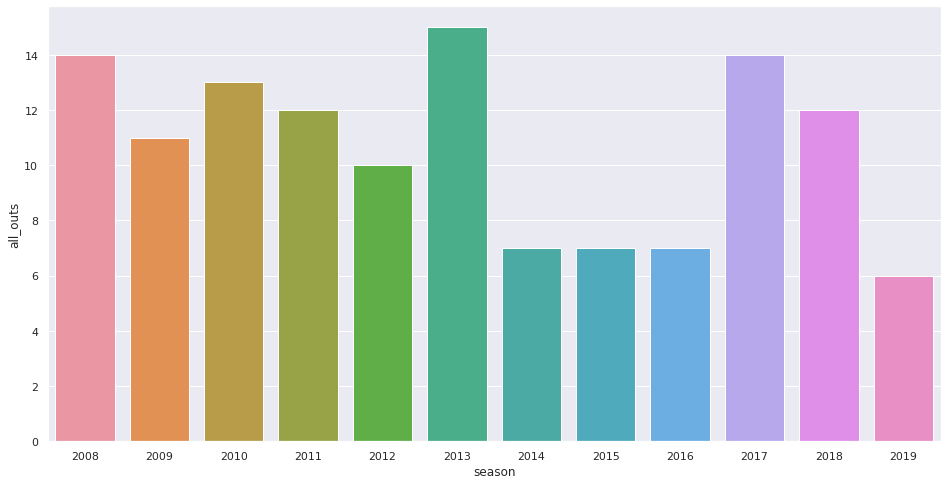

In [54]:
plt.figure(figsize=(16,8))
sns.barplot(x='season', y='all_outs', data = season)

#### The 2013 season had the most (16) all-outs (obviously!) 
#### The 2008 and 2017 had the second-most all-outs (14 each)

### Teams bowling all others out

In [61]:
tt = deliv.groupby(['match_id','inning','bowling_team'])['num_wkts'].sum().reset_index()
tt = tt[tt['num_wkts']==10]
tt = tt.groupby('bowling_team')['num_wkts'].count().reset_index()
tt

,bowling_team,num_wkts
0,CSK,17
1,DC,11
2,GL,2
3,KKR,10
4,KTK,1
5,KXIP,12
6,MI,25
7,RCB,16
8,RPS,2
9,RR,15


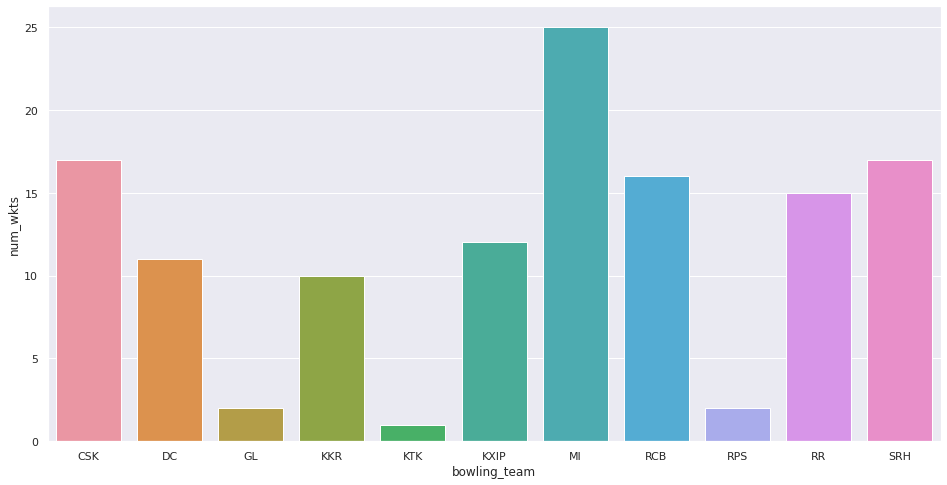

In [62]:
plt.figure(figsize=(16,8))
sns.barplot(x='bowling_team', y='num_wkts', data=tt)

#### Not surprising. Mumbai Indians have bowled other teams all-out 25 times. 
##### CSK fall way behind in the second place with 17 all-outs

### Teams being all-outs

In [63]:
tt = deliv.groupby(['match_id','inning','batting_team'])['num_wkts'].sum().reset_index()
tt = tt[tt['num_wkts']==10]
tt = tt.groupby('batting_team')['num_wkts'].count().reset_index()
tt

,batting_team,num_wkts
0,CSK,7
1,DC,19
2,GL,4
3,KKR,12
4,KTK,3
5,KXIP,15
6,MI,12
7,PW,5
8,RCB,17
9,RPS,1


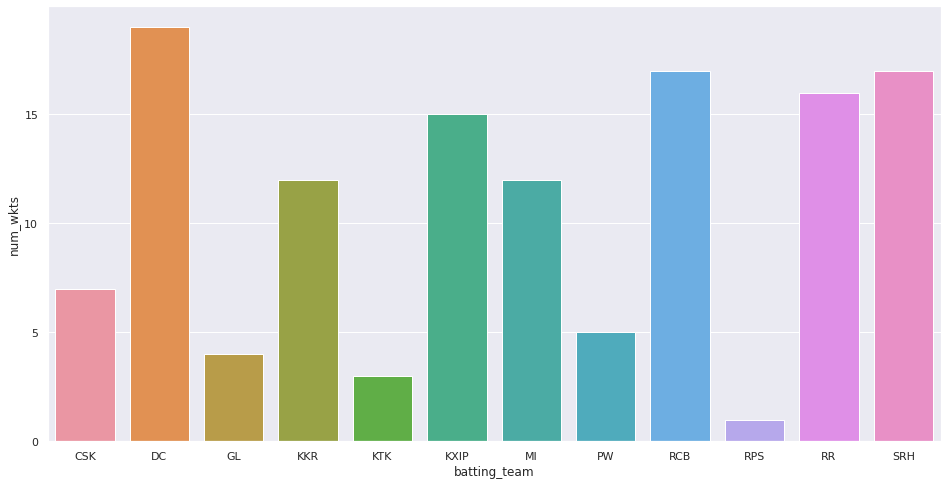

In [79]:
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,25,5))
sns.barplot(x='batting_team', y='num_wkts', data=tt)

#### Delhi Capitals have been all-out the most times (19) -- The reason they have the lowest win percentage among active teams.
#### Not lagging behind are :
- RCB & SRH (17, each)
- RR (16)
- KXIP (15)